In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

# Context

In [2]:
df = pd.read_csv('train.csv', index_col='PassengerId')
df['Survived'] = df['Survived'].replace({0: 'No', 1: 'Yes'})

df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,Yes,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,No,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,No,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,No,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,Yes,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


# Data quality assessment

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  object 
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  object 
 4   Age       96708 non-null   float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Ticket    95377 non-null   object 
 8   Fare      99866 non-null   float64
 9   Cabin     32134 non-null   object 
 10  Embarked  99750 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 9.2+ MB


3.292% Age values were missing before filling


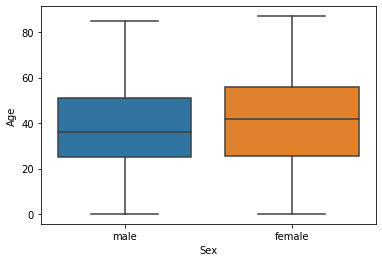

In [4]:
missing = df['Age'].isna().sum() * 100 / len(df)
print(f'{missing}% Age values were missing before filling')
sns.boxplot(x='Sex', y='Age', data=df)

for sex, group in df.groupby('Sex'):
    index = group[group['Age'].isna()].index
    values = np.random.normal(loc=group['Age'].mean(), scale=group['Age'].std(), size=group['Age'].isna().sum())
    
    df['Age'].fillna(pd.Series(values, index=index), inplace=True)

Missing Fare values in train dataset 0.134% < 1%


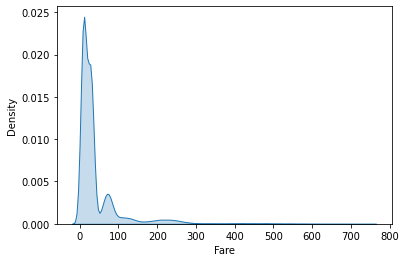

In [5]:
missing = df['Fare'].isnull().sum() * 100 / len(df['Fare'])
print(f'Missing Fare values in train dataset {missing}% < 1%')

sns.kdeplot(x='Fare', data=df, shade=True)

for _, group in df.groupby('Pclass'):
    index = group[(group['Fare'].isna()) | (group['Fare'] > 300)].index
    df.loc[index, 'Fare'] = group['Fare'].median()

# Data exploration

<AxesSubplot:xlabel='Survived', ylabel='count'>

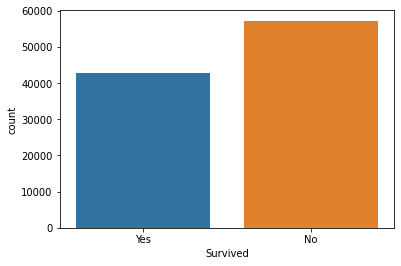

In [6]:
sns.countplot(x=df['Survived'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

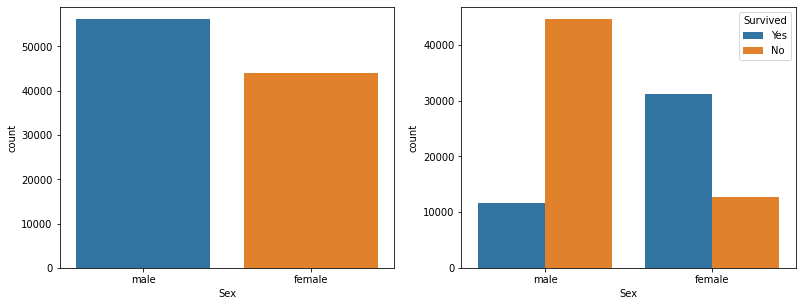

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13.2, 4.8))

sns.countplot(x=df['Sex'], ax=ax1)
sns.countplot(x=df['Sex'], hue=df['Survived'], ax=ax2)

Text(0.5, 0, 'parents / children')

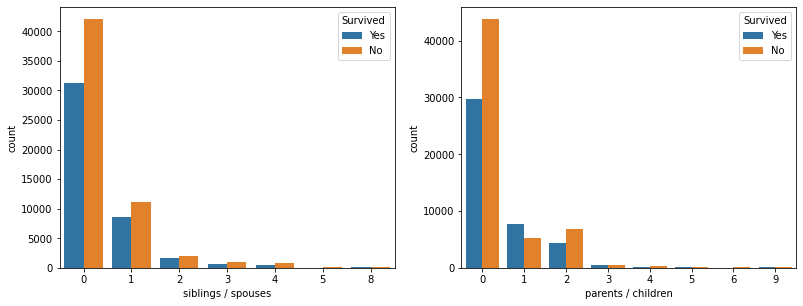

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13.2, 4.8))

sns.countplot(x='SibSp', hue='Survived', data=df, ax=ax1).set_xlabel('siblings / spouses')
sns.countplot(x='Parch', hue='Survived', data=df, ax=ax2).set_xlabel('parents / children')

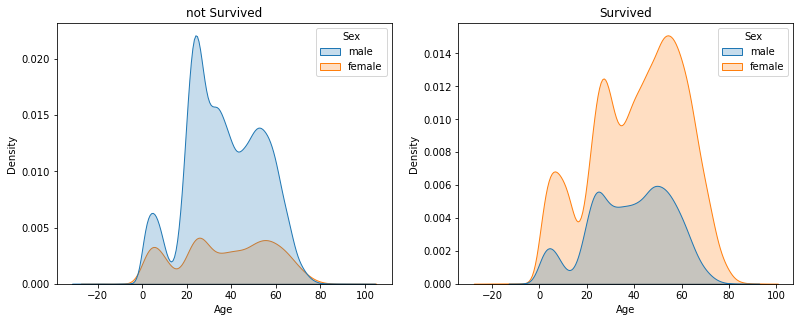

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(13.2, 4.8))

for (label, group), ax in zip(df.groupby('Survived'), axs):
    ax.set_title('Survived' if label == 'Yes' else 'not Survived')
    sns.kdeplot(x=group['Age'], hue=group['Sex'], shade=True, ax=ax)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

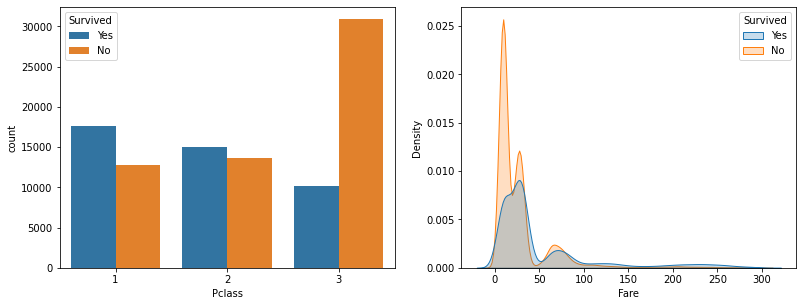

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13.2, 4.8))

sns.countplot(x=df['Pclass'], hue=df['Survived'], ax=ax1)
sns.kdeplot(x='Fare', hue='Survived', data=df, shade=True, ax=ax2)

# Summary

In [11]:
train_df = df.loc[:, ['Sex', 'Age', 'SibSp', 'Parch', 'Pclass', 'Fare', 'Survived']]
train_df['Sex'] = train_df['Sex'].replace({'male': 0, 'female': 1})
train_df['Survived'] = train_df['Survived'].replace({'No': 0, 'Yes': 1})

train_df.head()

,Sex,Age,SibSp,Parch,Pclass,Fare,Survived
PassengerId,,,,,,,
0,0,18.861847,2,0,1,27.14,1
1,0,52.877358,0,0,3,13.35,0
2,0,0.330000,1,2,3,71.29,0
3,0,19.000000,0,0,3,13.04,0
4,0,25.000000,0,0,3,7.76,1


In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Sex       100000 non-null  int64  
 1   Age       100000 non-null  float64
 2   SibSp     100000 non-null  int64  
 3   Parch     100000 non-null  int64  
 4   Pclass    100000 non-null  int64  
 5   Fare      100000 non-null  float64
 6   Survived  100000 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 8.1 MB


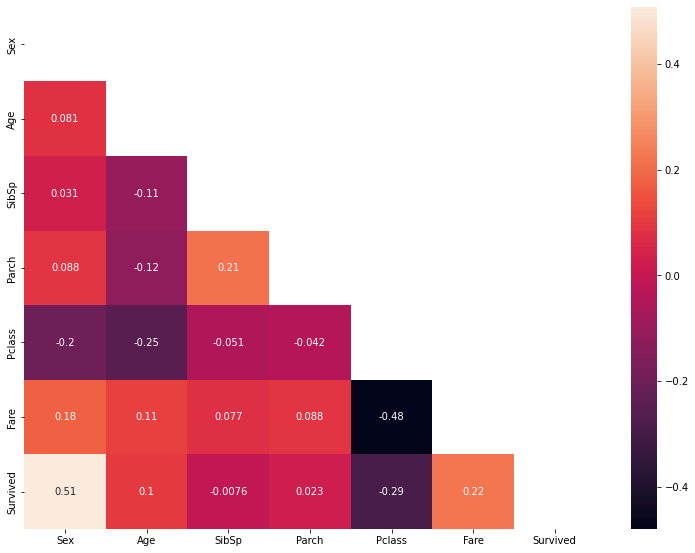

In [13]:
mask = np.triu(np.ones_like(train_df.corr()))
 
fig, ax = plt.subplots(figsize=(12.8, 9.6))
dataplot = sns.heatmap(train_df.corr(), annot=True, mask=mask)

In [14]:
sex_corr = train_df.corr().loc['Survived', 'Sex']
pclass_corr = train_df.corr().loc['Survived', 'Pclass']
fare_corr = train_df.corr().loc['Survived', 'Fare']

In [15]:
print(f'Strongest Survived correlation with Sex: {sex_corr:.2f}, Pclass: {pclass_corr:.2f}, Fare: {fare_corr:.2f}')

percent = len(train_df[train_df['Parch'] == 1]) * 100 / len(train_df)
rate = train_df.loc[train_df['Parch'] == 1, 'Survived'].sum() * 100 / len(train_df[train_df['Parch'] == 1])
print(f'*Part of people with 1 parent or child {percent:.2f}%, proportion of survivors among them {rate:.2f}%')

Strongest Survived correlation with Sex: 0.51, Pclass: -0.29, Fare: 0.22
*Part of people with 1 parent or child 13.00%, proportion of survivors among them 59.20%
